# Exploratory Data Analysis on Titanic Dataset

survived: This column typically represents whether a passenger survived or not. It is a binary variable where 0 could mean the passenger did not survive, and 1 could mean the passenger survived.

pclass: Stands for passenger class, indicating the class of the ticket the passenger purchased. It is a categorical variable with three levels: 1, 2, and 3, representing first, second, and third class, respectively.

sex: Represents the gender of the passenger. It is a categorical variable with values 'male' and 'female'.

age: Represents the age of the passenger. It is a continuous numerical variable.

sibsp: Stands for the number of siblings or spouses the passenger had aboard the Titanic. It is a numerical variable.

parch: Stands for the number of parents or children the passenger had aboard the Titanic. It is a numerical variable.

fare: Represents the fare or the amount of money the passenger paid for the ticket. It is a continuous numerical variable.

embarked: Represents the port at which the passenger boarded the Titanic. It is a categorical variable with values 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton).

class: Similar to pclass, this represents the passenger class. It is a categorical variable with three levels: 'First', 'Second', and 'Third'.

who: Represents the gender/age group of the passenger. It is a categorical variable with values 'man', 'woman', and 'child'.

adult_male: A binary variable indicating whether the passenger is an adult male (1) or not (0).

deck: Represents the deck where the passenger's cabin was located. It is a categorical variable.

embark_town: Similar to embarked, it represents the town where the passenger boarded the Titanic. It is a categorical variable.

alive: Another column representing the survival status. It is typically a duplicate or similar to the survived column.

alone: A binary variable indicating whether the passenger was traveling alone (1) or with family (0).

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

seaborn have a inbuilt datasets,titanic is the one of main dataset
you can check it out by this line-->sns.get_dataset_names()

In [2]:
data = sns.load_dataset('titanic')

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Exploratory Data Analysis


In [5]:
data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

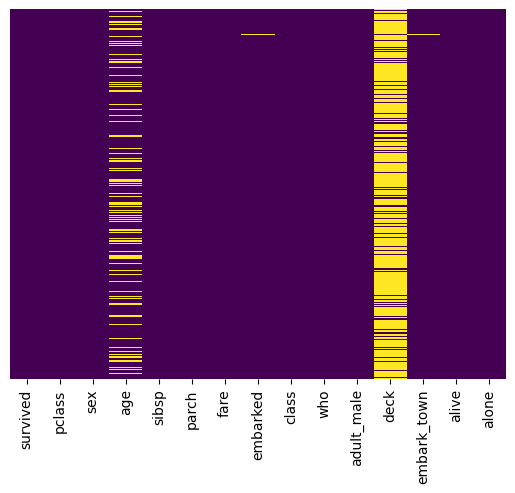

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the deck column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "deck Known: 1 or 0", embark and embark_town have only few of missing values.

In [7]:
data[['age','embarked','deck','embark_town']].isnull().sum()

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

<AxesSubplot: xlabel='survived', ylabel='count'>

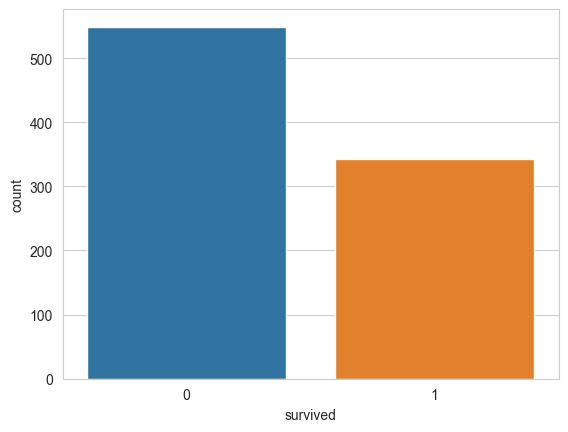

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=data)

<AxesSubplot: xlabel='survived', ylabel='count'>

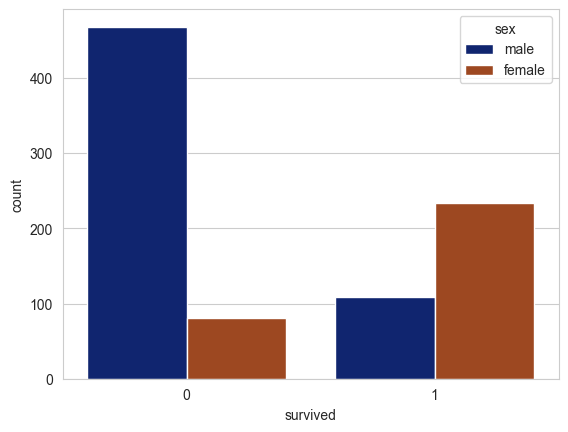

In [9]:
sns.countplot(x='survived',hue='sex',data=data,palette='dark')

(By looking at the plot above, we can conclude that males are unlucky. LOL :),   The chance of survival for males is low.

<AxesSubplot: xlabel='survived', ylabel='count'>

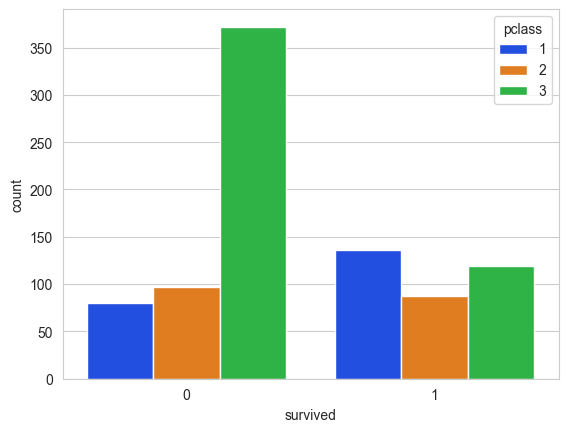

In [10]:
sns.countplot(x='survived',hue='pclass',data=data,palette='bright')

<AxesSubplot: xlabel='age'>

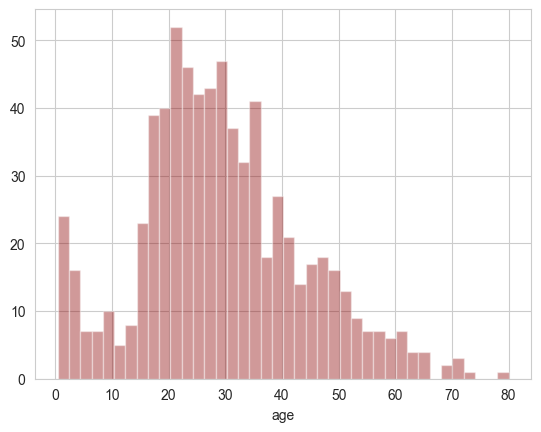

In [11]:
sns.distplot(data['age'].dropna(),kde=False,color='darkred',bins=40)

The number of individuals aged between 18 and 36 is very high

array([[<AxesSubplot: title={'center': 'fare'}>]], dtype=object)

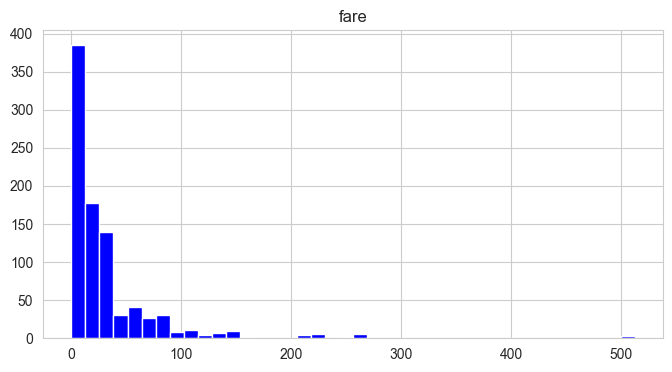

In [12]:
data[['fare']].hist(color='blue',bins=40,figsize=(8,4))

In [13]:
# import plotly.graph_objects as go
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=data['fare'], marker=dict(color='blue'), nbinsx=40))
# fig.show()

In [14]:
# pip install cufflinks
# import cufflinks as cf
# cf.go_offline()
# data['fare'].iplot(kind='hist',bins=30,color='green')

## Data Cleaning


<AxesSubplot: xlabel='pclass', ylabel='age'>

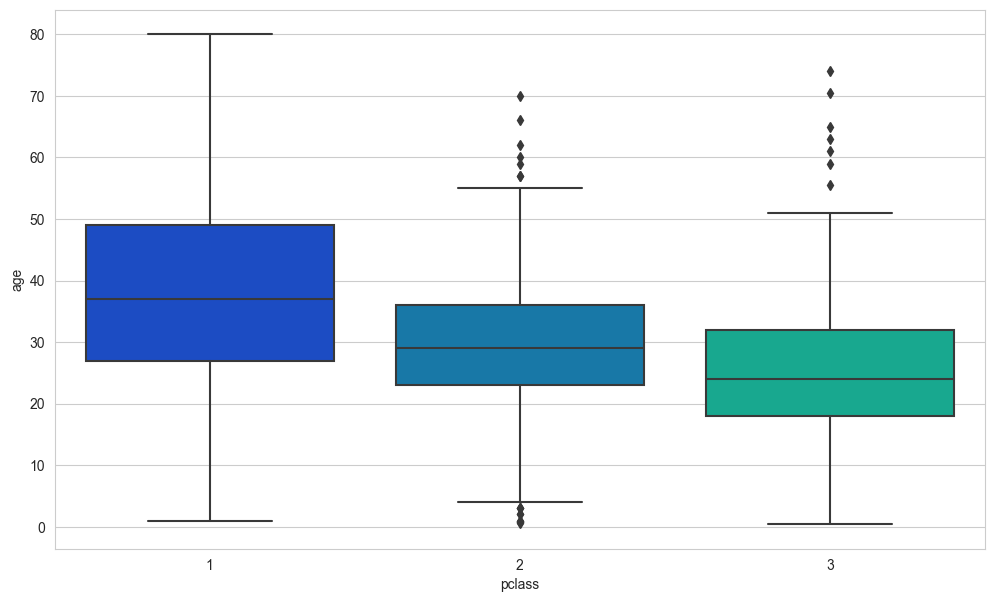

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=data,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.



In [16]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

In [17]:
data['age'] = data[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot: >

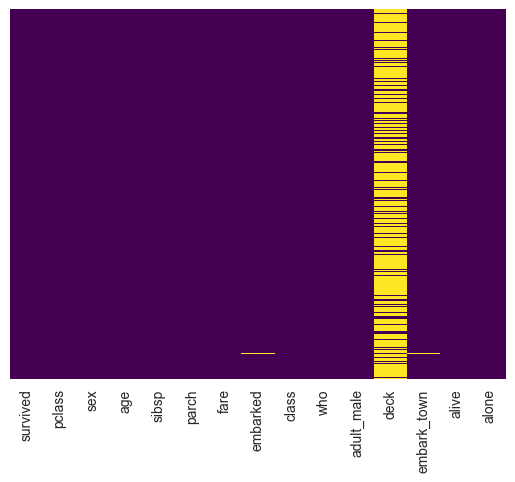

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

let us remove the null values in the embarked column

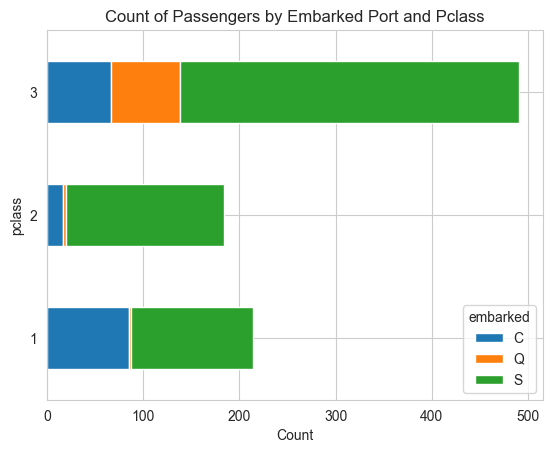

In [19]:
data.groupby(['pclass', 'embarked']).size().unstack().plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('pclass')
plt.title('Count of Passengers by Embarked Port and Pclass')
plt.show()

In [20]:
data.embarked.fillna('S',inplace=True)

Let us drop unwanted columns

In [21]:
data.drop(['class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

<AxesSubplot: >

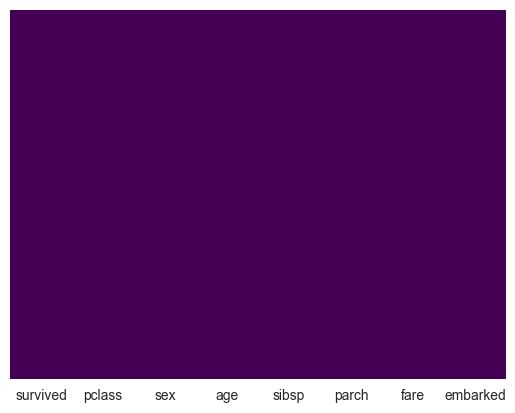

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

Great!

## Converting Categorical Features

In [23]:
dummies = pd.get_dummies(data[['embarked','sex']])

In [24]:
data = pd.concat([data,dummies], axis=1)

In [25]:
data.drop(['sex','embarked'],axis=1,inplace=True)

In [26]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


## Building a Model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [29]:
X.shape, y.shape

((891, 10), (891,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

### LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
test_pred= model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy = accuracy_score(y_test, test_pred)
print(f'Accuracy: {accuracy}')
confusion_matrix(y_test,test_pred)

Accuracy: 0.8044692737430168


array([[90, 15],
       [20, 54]], dtype=int64)

In [35]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



### RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rf_classifier,  # Classifier to tune
    param_distributions=param_grid,  # Hyperparameter grid
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Metric to optimize
    random_state=42  # Seed for reproducibility
)

In [50]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = random_search.best_estimator_
random_search.fit(X_train, y_train)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [51]:
test_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.8100558659217877


In [52]:
train_pred = best_model.predict(X_train)
accuracy = accuracy_score(y_train, train_pred)
print("train Set Accuracy:", accuracy)

train Set Accuracy: 0.8974719101123596


In [57]:
print(f'test set report{classification_report(y_test,test_pred)}')
print(f'train set report{classification_report(y_train,train_pred)}')

test set report              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

train set report              precision    recall  f1-score   support

           0       0.88      0.96      0.92       444
           1       0.93      0.79      0.85       268

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712



RandomForest is better comparitively